In [2]:
import pandas as pd

X_train = pd.read_csv('8000rpm_data_z-score/train_sample_fft.csv').values
X_test = pd.read_csv('8000rpm_data_z-score/test_sample_fft.csv').values

In [3]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
X_train_scaled = np.apply_along_axis(
    lambda row: scaler.fit_transform(row.reshape(-1, 1)).flatten(), axis=1, arr=X_train)
X_test_scaled = np.apply_along_axis(
    lambda row: scaler.fit_transform(row.reshape(-1, 1)).flatten(), axis=1, arr=X_test)

pd.DataFrame(X_train_scaled).to_csv('8000rpm_data_z-score/train_sample_fft_scaled.csv', index=False)
pd.DataFrame(X_test_scaled).to_csv('8000rpm_data_z-score/test_sample_fft_scaled.csv', index=False)

In [18]:

def moving_average(signal, window_size=5):
    return np.convolve(signal, np.ones(window_size)/window_size, mode='valid')

X_train_smoothed = np.apply_along_axis(
    moving_average, 
    axis=1, 
    arr=X_train_scaled, 
    window_size=5)

X_test_smoothed = np.apply_along_axis(
    moving_average, 
    axis=1, 
    arr=X_test_scaled, 
    window_size=5)

pd.DataFrame(X_train_smoothed).to_csv('8000rpm_data_z-score/train_sample_fft_p.csv', index=False)
pd.DataFrame(X_test_smoothed).to_csv('8000rpm_data_z-score/test_sample_fft_p.csv', index=False)

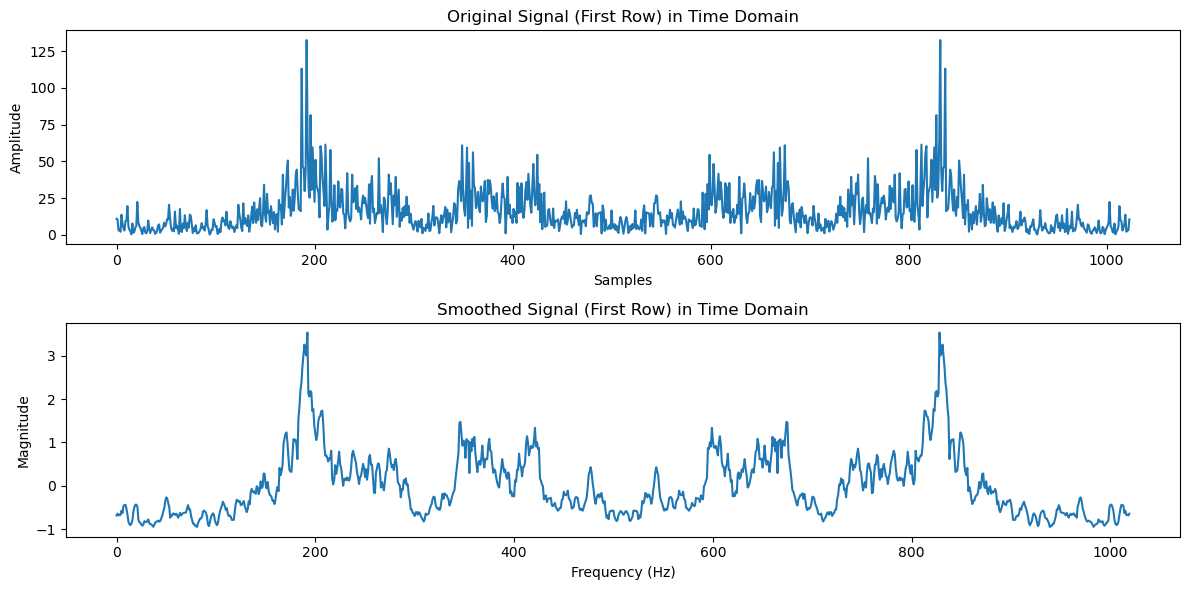

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(X_train[0, :])
plt.title('Original Signal (First Row) in Time Domain')
plt.xlabel('Samples')
plt.ylabel('Amplitude')

# Plot the magnitude of the Fourier Transform (frequency domain)
plt.subplot(2, 1, 2)
plt.plot(smoothed_signal)  # Frequency axis
plt.title('Smoothed Signal (First Row) in Time Domain')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=64)  # Set the number of components to retain
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.fit_transform(X_test_scaled)
pd.DataFrame(X_train_pca).to_csv('8000rpm_data_z-score/train_sample_fft_pca.csv', index=False)
pd.DataFrame(X_test_pca).to_csv('8000rpm_data_z-score/test_sample_fft_pca.csv', index=False)